# _Health Insurance Cost_
***
<b>DESCRIPTION</b>

Health insurance has become an indispensable part of our lives in recent years, and people are paying for it so that they are covered in the event of an accident or other unpredicted factors.
You are provided with medical costs dataset that has features such as Age, Cost, BMI.

<b>Objective:</b>

Determine the factors that contribute the most in the calculation of insurance costs.
Predict the health Insurance Cost.
Actions to Perform:

- Find the correlation of every pair of features (and the outcome variable).
- Visualize the correlations using a heatmap.
- Normalize your inputs.
- Use the test data to find out the accuracy of the model.
- Visualize how your model uses the different features and which features have a greater effect.

In [792]:
#os specifics and versions
import os
import sys
assert sys.version_info >= (3,5)
#arrays and dataframes operations 
import numpy as np
import pandas as pd
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline 
#consistent plot sizes
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
#handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#To accommodate maximum number of colums in Jupyter
pd.options.display.max_columns = False
#statistical package
import statistics
#modeling
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
#cross validation
from sklearn.model_selection import cross_val_score
#model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [793]:
#load the data
insurance = pd.read_csv('insurance2.csv',delimiter=',',engine='python')
insurance.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


<font color = blue>_The scale of the features are very different.It would be better to scale before model fitting._</font>

In [794]:
#check info
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


<font color=blue>_There are no null values in the dataset and all variables are of numeric type_</font>

In [795]:
#check basic stats
insurance.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


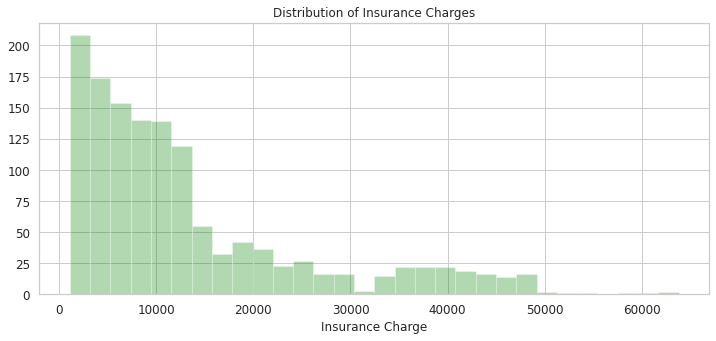

In [796]:
plt.hist(insurance['charges'],bins=30,color='green',alpha=0.3)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Insurance Charge')
plt.show()

_The data is right skewed_

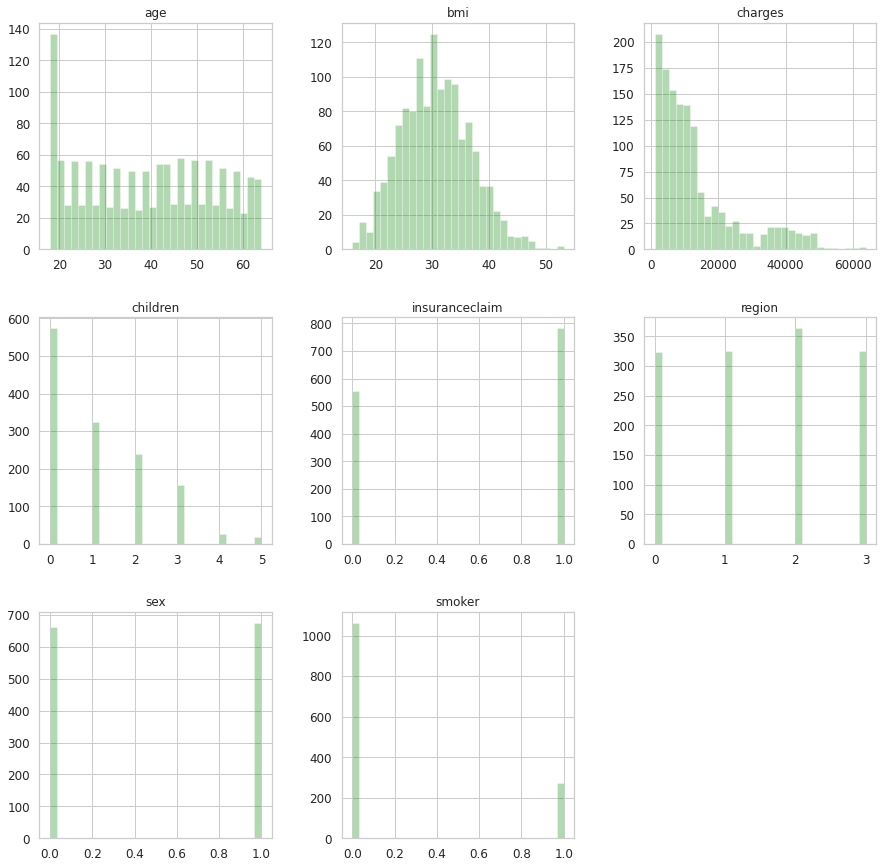

In [797]:
insurance.hist(bins=30,figsize=(15,15),color='green',alpha=0.3)
plt.show()

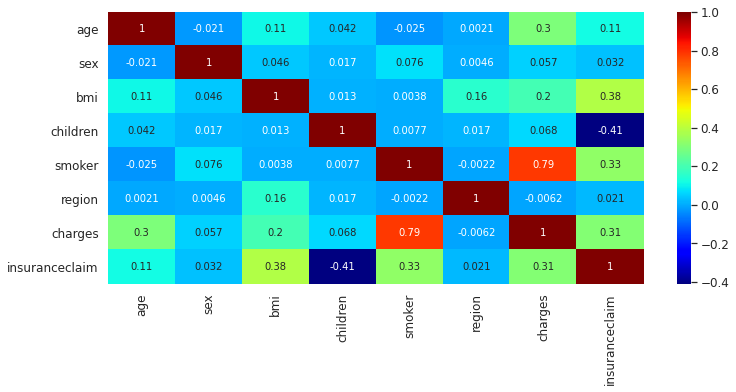

In [798]:
#check the correlation heatmap
sns.heatmap(insurance.corr(),annot=True,cmap=plt.get_cmap('jet'))
plt.show()

<font color = blue> _Insurance Charges has very high correlation with smoker and relatively moderate correlation with age, bmi and insurance claim_</font>

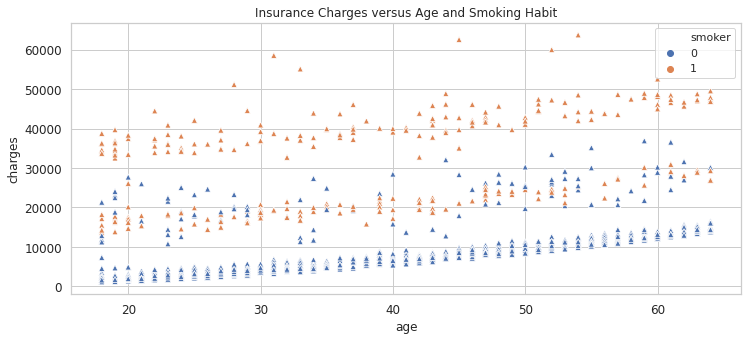

In [799]:
sns.scatterplot('age','charges',data=insurance,hue='smoker',marker='^')
plt.title('Insurance Charges versus Age and Smoking Habit')
plt.show()

<font color = blue> _if the person is a smoker then irrespective of the age, the insurance charges are higher. For a non smoker, the insurance charge increases gradually with age and some other factirs like bmi or claim is influencing the usual pattern_</font>

In [800]:
#correlation of every variable with each other
insurance.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


In [801]:
#correlation of every variable and the outcome variable
insurance.corr()['charges'].sort_values(ascending=False)

charges           1.000000
smoker            0.787251
insuranceclaim    0.309418
age               0.299008
bmi               0.198341
children          0.067998
sex               0.057292
region           -0.006208
Name: charges, dtype: float64

In [802]:
#check for multicollinearity
#For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
insurance_num_features = insurance.select_dtypes(exclude='object').columns.tolist()
X = insurance[insurance_num_features].drop('charges',axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [803]:
#print the vif highest to lowest .. 
vif.sort_values(by='VIF Factor',ascending=False)

,VIF Factor,features
2,13.895489,bmi
0,7.584349,age
6,4.193492,insuranceclaim
5,2.935155,region
3,2.407817,children
1,2.002530,sex
4,1.490270,smoker


_The VIF of the bmi and age is relatively on the higher side but not so much. Applying dimensionality reduction would be a better approach_

In [804]:
## Create bins for the various age groups
bins = [10,20,30,40,50,60,70]
labels = [1,2,3,4,5,6]
x = pd.cut(insurance['age'],bins,labels=labels)

In [805]:
insurance['age_category'] = x

In [806]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             1338 non-null   int64   
 1   sex             1338 non-null   int64   
 2   bmi             1338 non-null   float64 
 3   children        1338 non-null   int64   
 4   smoker          1338 non-null   int64   
 5   region          1338 non-null   int64   
 6   charges         1338 non-null   float64 
 7   insuranceclaim  1338 non-null   int64   
 8   age_category    1338 non-null   category
dtypes: category(1), float64(2), int64(6)
memory usage: 85.3 KB


In [807]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim,age_category
0,19,0,27.900,0,1,3,16884.92400,1,1
1,18,1,33.770,1,0,2,1725.55230,1,1
2,28,1,33.000,3,0,2,4449.46200,0,2
3,33,1,22.705,0,0,1,21984.47061,0,3
4,32,1,28.880,0,0,1,3866.85520,1,3


In [808]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             1338 non-null   int64   
 1   sex             1338 non-null   int64   
 2   bmi             1338 non-null   float64 
 3   children        1338 non-null   int64   
 4   smoker          1338 non-null   int64   
 5   region          1338 non-null   int64   
 6   charges         1338 non-null   float64 
 7   insuranceclaim  1338 non-null   int64   
 8   age_category    1338 non-null   category
dtypes: category(1), float64(2), int64(6)
memory usage: 85.3 KB


In [809]:
#convert age category from category to int data type .. 
insurance['age_category'] = insurance['age_category'].astype(int)
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
 8   age_category    1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


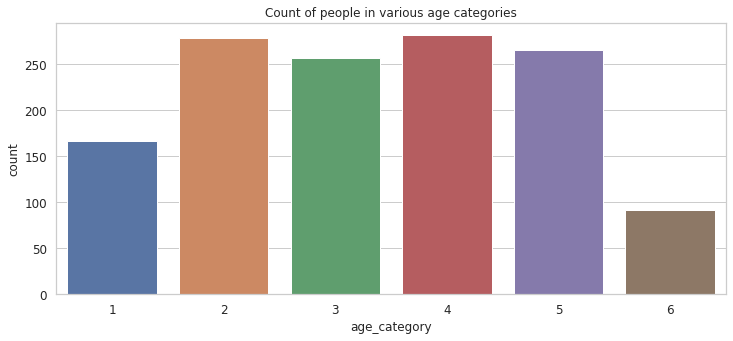

In [810]:
sns.countplot(x='age_category',data=insurance)
plt.title('Count of people in various age categories')
plt.show()

_Now the data is well balanced when compared against the age categories. Splitting the data based on this stratification will result in a better generalisation_

In [811]:
insurance.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim,age_category
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723,0.980422
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565,-0.020674
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198,0.114376
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526,0.043143
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261,-0.025098
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891,0.000713
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418,0.293424
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000,0.116385
age_category,0.980422,-0.020674,0.114376,0.043143,-0.025098,0.000713,0.293424,0.116385,1.000000


_there is high correlation between age and age_category and this is expected. The correlation of charges with age and age_category is also very similar. Drop the age column. Also region does not seem to have correlation with any of the other features and also not with the target_

In [812]:
#insurance.drop('age',axis=1,inplace=True)


In [813]:
#Split the data into train and test 
random_state = 1
test_size = 0.2
n_splits = 10

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=n_splits,random_state=random_state,test_size=test_size)

In [814]:
#split the data based on stratified shuffle split on age categories .. 
for train_indices,test_indices in split.split(insurance,insurance['age_category']):
    strat_train_set = insurance.loc[train_indices]
    strat_test_set = insurance.loc[test_indices]

In [815]:
#check the distribution of the age categories people in the test set
strat_test_set['age_category'].value_counts() / len(strat_test_set)

4    0.208955
2    0.208955
5    0.197761
3    0.194030
1    0.123134
6    0.067164
Name: age_category, dtype: float64

In [816]:
#check the distribution of the age categories people in the train set
strat_train_set['age_category'].value_counts() / len(strat_train_set)

4    0.210280
2    0.207477
5    0.198131
3    0.191589
1    0.124299
6    0.068224
Name: age_category, dtype: float64

<font color = blue> ***_Using stratified shuffle split the split ratio based on age categories is very similar in the train and the test set._*** </font>

In [817]:
#split into the input features and output label/target 
X_train = strat_train_set.drop('charges',axis=1)
y_train = strat_train_set['charges']

X_test = strat_test_set.drop('charges',axis=1)
y_test = strat_test_set['charges']

In [818]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 842 to 357
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1070 non-null   int64  
 1   sex             1070 non-null   int64  
 2   bmi             1070 non-null   float64
 3   children        1070 non-null   int64  
 4   smoker          1070 non-null   int64  
 5   region          1070 non-null   int64  
 6   insuranceclaim  1070 non-null   int64  
 7   age_category    1070 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 75.2 KB


In [819]:
X_train.head(2)

,age,sex,bmi,children,smoker,region,insuranceclaim,age_category
842,23,0,32.78,2,1,2,1,2
610,47,0,29.37,1,0,2,0,4


In [820]:
#check for normality of bmi column
from scipy.stats import shapiro
stats,p = shapiro(X_train['bmi'])
if p <0.05:
    print('Reject Null Hypothesis: BMI Data is not normal')
else:
    print('Fail to Reject Null Hypothesis: BMI Data is normal')

Reject Null Hypothesis: BMI Data is not normal


In [821]:
#power transformation of the bmi feature
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import normalize

pt = PowerTransformer()
X_train['bmi'] = pt.fit_transform(X_train['bmi'].values.reshape(-1,1))
X_test['bmi'] = pt.transform(X_test['bmi'].values.reshape(-1,1))

In [822]:
X_train.head(3)

,age,sex,bmi,children,smoker,region,insuranceclaim,age_category
842,23,0,0.422349,2,1,2,1,2
610,47,0,-0.135518,1,0,2,0,4
1193,48,0,1.003073,0,0,1,1,4


In [823]:
X_test.head(3)

,age,sex,bmi,children,smoker,region,insuranceclaim,age_category
536,33,0,1.340831,3,0,3,0,3
1063,36,1,-0.267730,3,0,1,0,3
1284,61,1,0.962264,1,1,3,1,6


In [824]:
#check for normality of bmi column after transformation / normalization
from scipy.stats import shapiro
stats,p = shapiro(X_train['bmi'])
print('p-value = {}'.format(round(p,2)))
if p <0.05:
    print('Reject Null Hypothesis: BMI Data is not normal')
else:
    print('Fail to Reject Null Hypothesis: BMI Data is normal')

p-value = 0.19
Fail to Reject Null Hypothesis: BMI Data is normal


_Now the bmi data has become normal. The target value charges is heavily skewed to the right. This may hamper the model learning and convergence of the model._

In [825]:
#standardization of the target variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))

In [826]:
#change to 1D array instead of a vector else gives warnings when modeling
y_train = y_train.reshape(y_train.shape[0],) 
y_test = y_test.reshape(y_test.shape[0],)

## _Modeling_

In [827]:
#compare the MSE and RMSE of various models as a baseline score
models = {'Linear Regression':LinearRegression(),
          'Lasso':Lasso(alpha=0.5,random_state=random_state),
          'Ridge':Ridge(alpha=0.5,random_state=random_state),
          'ElasticNet':ElasticNet(alpha=0.5,random_state=random_state),
          'Random Forest':RandomForestRegressor(random_state=random_state)}

for key,model in models.items():
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test,predictions)
    print('%s MSE: %.3f RMSE: %.3f'%(key,mse,np.sqrt(mse)))

Linear Regression MSE: 0.280 RMSE: 0.529
Lasso MSE: 1.196 RMSE: 1.094
Ridge MSE: 0.280 RMSE: 0.529
ElasticNet MSE: 1.079 RMSE: 1.039
Random Forest MSE: 0.179 RMSE: 0.423


_Random Forest Regressor returned the best model score. Check the average score using this model using cross validation and then finetune the model to improve the score_

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=500,random_state=random_state)
n_folds = 15
cvscores = cross_val_score(rf_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=n_folds,
                          verbose=1)
print('Cross Validation Score of Random Forest:%.3f'%(np.mean(-cvscores)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


<font color=blue>_The MSE of the random forest regressor is similar to the previous score. Hence, the score can be considered reliable representation of the model performance._</font>

In [ ]:
rf_reg.fit(X_train,y_train)
predictions = rf_reg.predict(X_test)
mse =  mean_squared_error(y_test,predictions)
print('MSE:%.3f RMSE:%.3f'%(mse,np.sqrt(mse)))

In [ ]:
actual_pred = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)
print('RMSE on actual scale:%.3f'%(np.sqrt(mean_squared_error(y_test,actual_pred))))

In [ ]:
strat_test_set['predicted charges'] =  actual_pred

In [ ]:
#comparison table of actual vs the predicted score 
strat_test_set[:10]

## _Further Improvement to the Model_

- _Hyper paramater tuning using Grid Search or Randomized Grid Search on the best performing baseline model_
- _Dimensionality reduction using PCA_

<b> _Other Experiments of Interest_</b>
- _Use Power Transformation on the target variable and check whether this results in better model convergence_
- _Use TransformTargetRegressor_ 